In [204]:
import sys
sys.path.insert(0,'python')
from classification import *
import pylab as plt
from fastRWpkl import *
from readSent import *
from scipy.ndimage.morphology import binary_dilation as bd
import scipy.ndimage as ndimage
import cPickle as pkl
import numpy as np
import scipy
from scipy import signal
from functools import partial
import multiprocessing
import numpy.ma as ma
from collections import Counter
import cPickle as pkl
import pylab as plt
from scipy.fftpack import dct, idct
import scipy.stats
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
from scipy import optimize
import matplotlib.patches as patches
from geo_trans import *
import gdal
%matplotlib inline

In [4]:
b4_modis = parallel_rw_pkl(None, 'allopb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'allopb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'allopb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'allopb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'allopb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'allopb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'allopb12_modis', 'r')

In [5]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


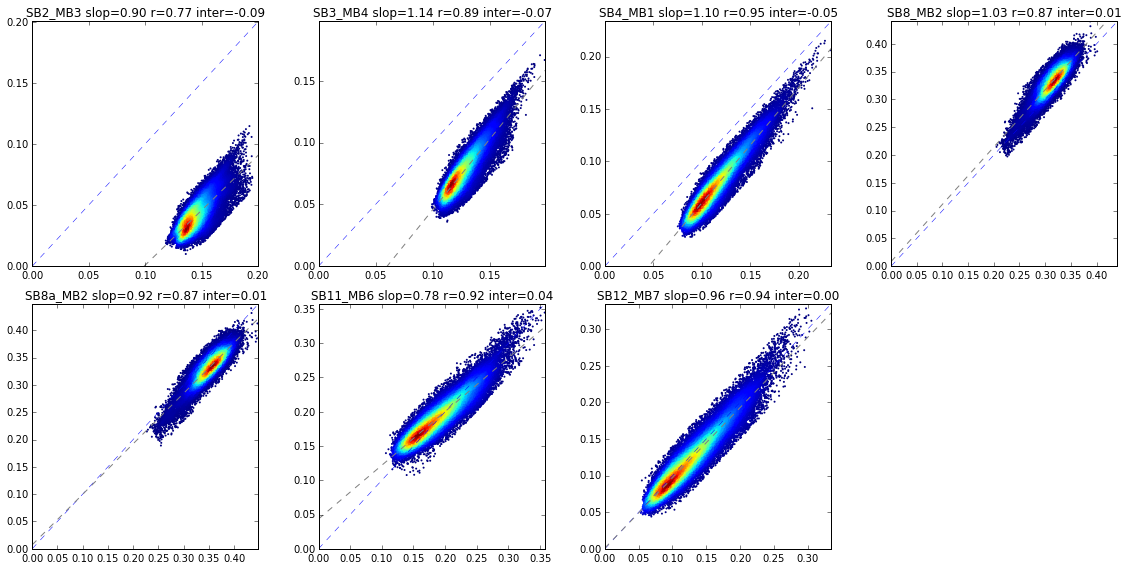

In [7]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

Applied to the results to the cloud free pixels

In [8]:
b4_modis = parallel_rw_pkl(None, 'allopcfb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'allopcfb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'allopcfb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'allopcfb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'allopcfb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'allopcfb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'allopcfb12_modis', 'r')

In [9]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

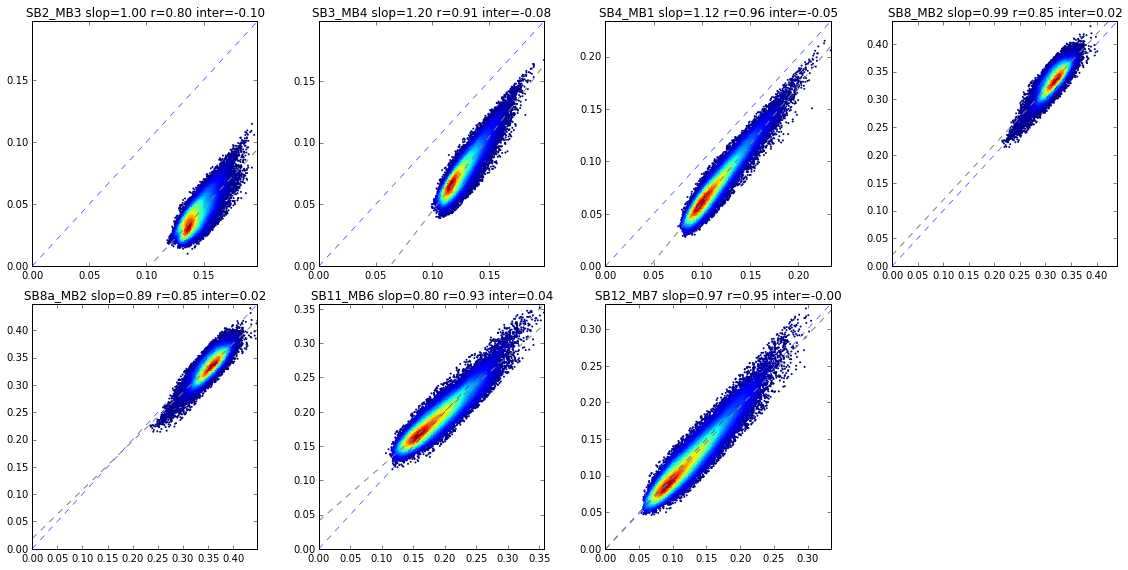

In [10]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

The test on the cloud for the already optimized parameters:

In [12]:
cm = parallel_rw_pkl(None, '0510diacm', 'r')
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
cprop = []
for i,j in patches:
    s1 = slice((i*1000),(i+1)*1000)
    s2 = slice((j*1000),(j+1)*1000)
    prop = (cm[s1,s2]).sum()/(1000.*1000.)
    cprop.append([i,j,prop])

In [15]:
pacm = np.zeros((10,10))
cprop = np.array(cprop).T
pacm[cprop[0].astype(int), cprop[1].astype(int)] = cprop[2]

<matplotlib.colorbar.Colorbar instance at 0x7ff90c116a70>

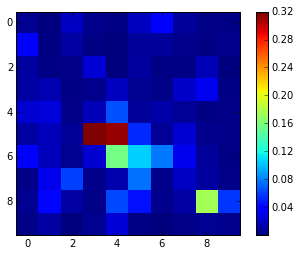

In [18]:
plt.imshow(pacm, interpolation ='Nearest')
plt.colorbar()

In [30]:
np.where(pacm<0.005)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4,
        4, 5, 5, 6, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9]),
 array([1, 3, 4, 8, 9, 1, 3, 4, 7, 8, 9, 1, 2, 4, 6, 7, 9, 2, 3, 6, 9, 2, 8,
        9, 8, 9, 9, 0, 3, 6, 9, 3, 6, 0, 2, 5, 6, 7]))

In [62]:
cf = []
for i in range(10):
     cf.append(np.where(pacm == pacm[i,:].min()))
cf = np.array(cf).reshape(10,2).T

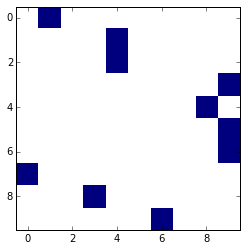

In [65]:
a = np.zeros((10,10))
a[:] = np.nan
a[cf[0], cf[1]] = 1
plt.imshow(a, interpolation = 'Nearest')

In [73]:
mc = []
for i in (np.sort(pacm.ravel())[:10]):
    mc.append(np.where(pacm == i))
mc = np.array(mc).reshape(10,2).T    

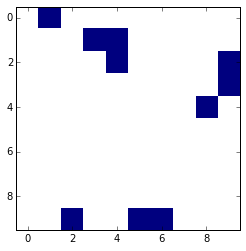

In [74]:
a = np.zeros((10,10))
a[:] = np.nan
a[mc[0], mc[1]] = 1
plt.imshow(a, interpolation = 'Nearest')

In [77]:
x,y = mc
mcs = zip(x,y)

In [185]:
solves = []
fnames = ['mcgopb2_modis','mcgopb3_modis','mcgopb4_modis',
         'mcgopb8_modis','mcgopb8a_modis', 'mcgopb11_modis','mcgopb12_modis']
for i in fnames:
    data = parallel_rw_pkl(None, i, 'r')
    solve = []
    for i in data:
        for j in i:
            solve.append([j[0], j[1], j[2][0][0], j[2][0][1], j[2][0][2],j[2][0][3],j[2][0][4],j[2][1]])
    solves.append(solve)
solves = np.array(solves).reshape(70,8).T

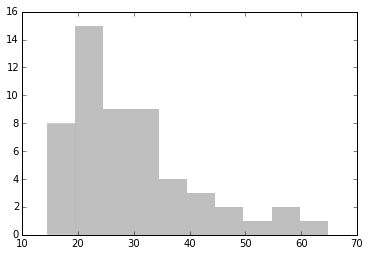

In [186]:
hist = plt.hist(solves[2][solves[2]<100], bins = 10, color='Gray', linewidth=0, alpha=0.5)

(0, 100)

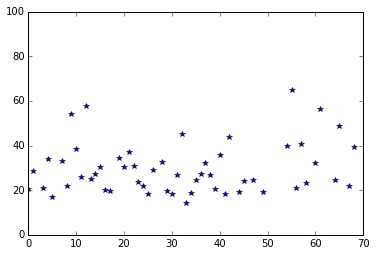

In [187]:
plt.plot(solves[2], '*')
plt.ylim(0,100)

In [188]:
(solves[2][solves[2]<100]).mean()

29.696923919385178

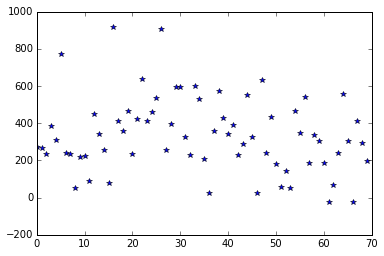

In [189]:
plt.plot(solves[3], '*')

339.96191637


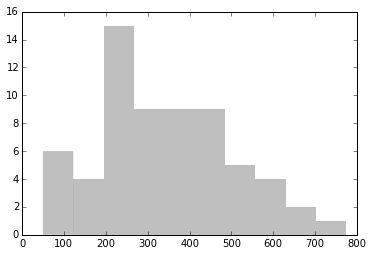

In [190]:
hist = plt.hist((solves[3][(solves[3]<800)&(solves[3]>30)]), bins = 10, color='Gray', linewidth=0, alpha=0.5)
print solves[3][(solves[3]<800)&(solves[3]>30)].mean()

45.8861022468


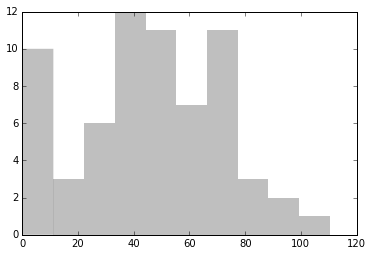

In [191]:
hist = plt.hist((solves[4][solves[4]>0]), bins = 10, color='Gray', linewidth=0, alpha=0.5)
print solves[4][solves[4]>0].mean()

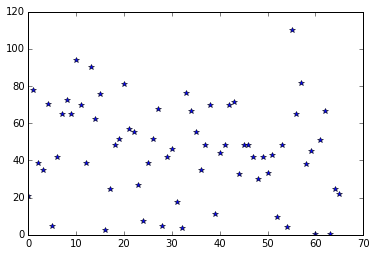

In [192]:
plt.plot(solves[4][solves[4]>0], '*')

-21.8540896067


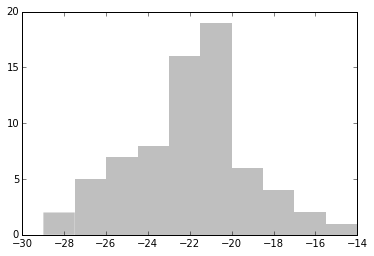

In [193]:
hist = plt.hist(solves[5], bins = 10, color='Gray', linewidth=0, alpha=0.5)
print solves[5].mean()

60.2630764605


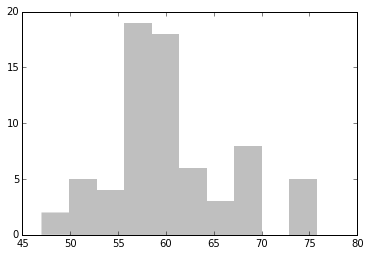

In [194]:
hist = plt.hist(solves[6], bins = 10, color='Gray', linewidth=0, alpha=0.5)
print solves[6].mean()

4 of 5 parameters is relativaly well constrained, with the histagrams show gathering effects on the valid range of the paramters. ystd shows the worest results which may be because it is along the track direction which should be an rectangle shape not a well simulated by the gaussian distribution and then shows many local minimums.... 

The results from the solved paramters..

In [195]:
b4_modis = parallel_rw_pkl(None, 'fiopb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'fiopb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'fiopb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'fiopb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'fiopb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'fiopb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'fiopb12_modis', 'r')

In [196]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

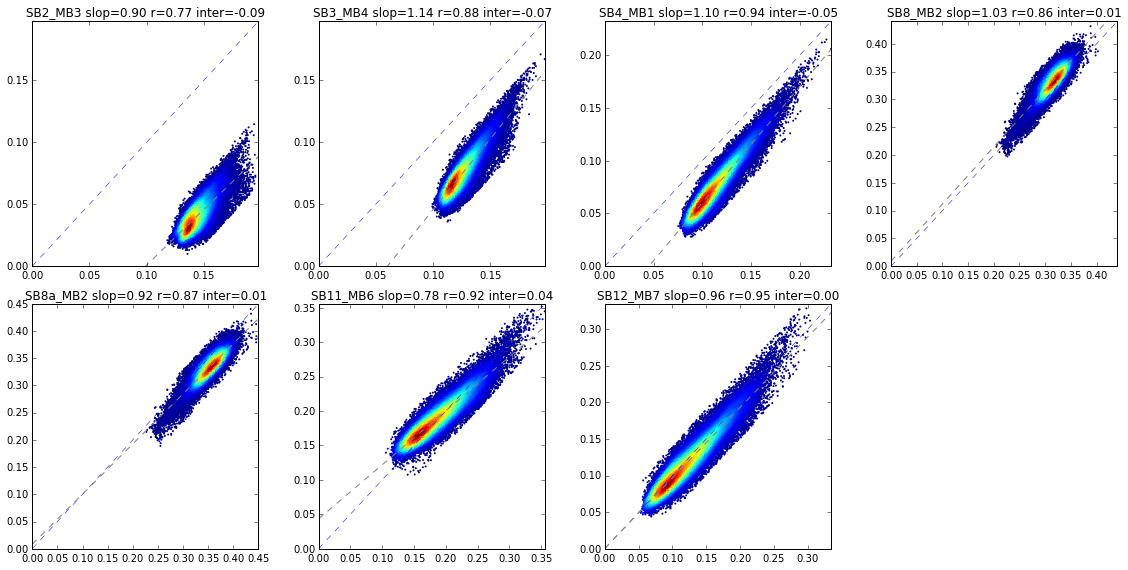

In [199]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

Results for 10 patches with the smallest proportion of clouds:

In [200]:
b4_modis = parallel_rw_pkl(None, 'ficmopb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'ficmopb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'ficmopb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'ficmopb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'ficmopb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'ficmopb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'ficmopb12_modis', 'r')

In [201]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

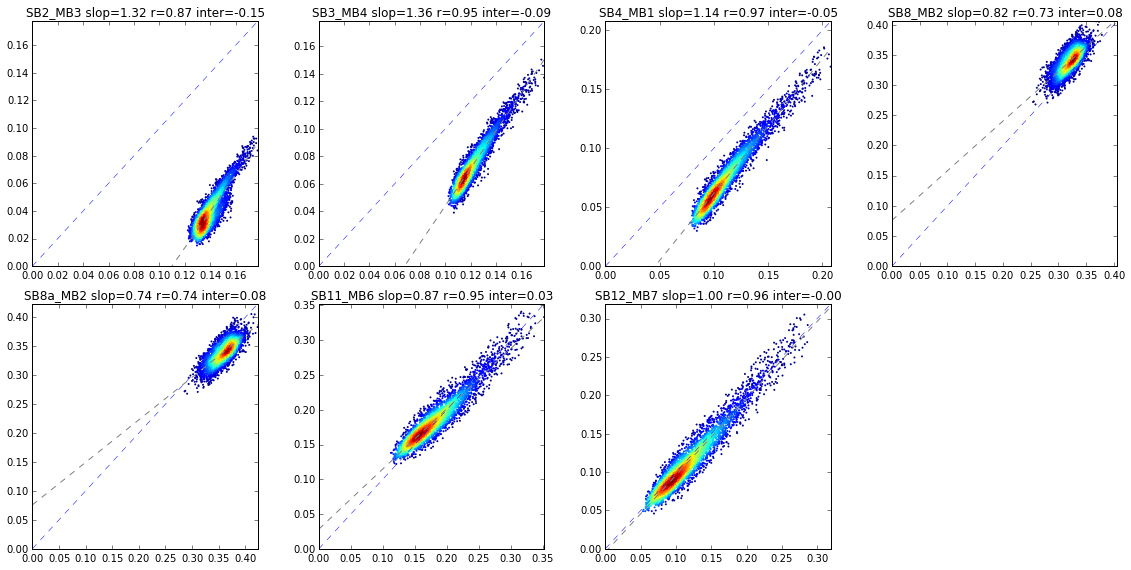

In [202]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

Band 8 and Band 8a always show a different results compared to the rest bands, which maybe because of their spectral properties are different from the rest bands, which need to look into detail.

In [207]:
b8 = gdal.Open('data/50SMG20165100B08.jp2').ReadAsArray()

data = parallel_rw_pkl(None, 'inter_sent%i'%3, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%3, 'r')

In [222]:
b8 = b8/10000.

In [224]:
data[mask] = np.nan
b8[cm] = np.nan

<matplotlib.colorbar.Colorbar instance at 0x7ff90d24e758>

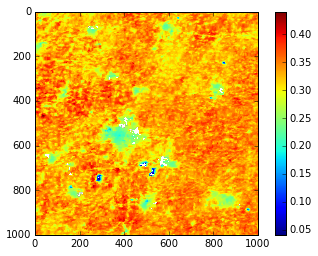

In [228]:
plt.imshow(data[:10000:10,:10000:10]*0.001)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7ff90d081950>

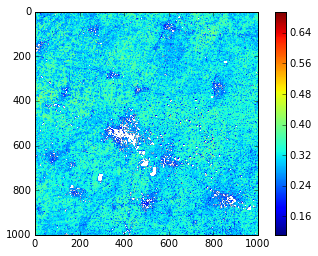

In [229]:
plt.imshow(b8[:10000:10,:10000:10])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7ff90cfd7878>

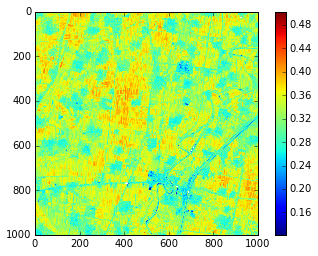

In [232]:
plt.imshow(b8[2000:3000, 4000:5000])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7ff90caac440>

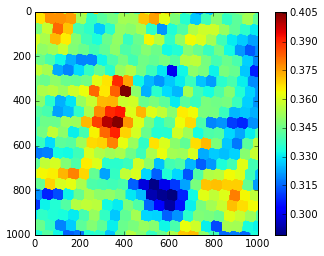

In [235]:
plt.imshow(modis_sent[2000:3000, 4000:5000]*0.001)
plt.colorbar()

In [236]:
parallel_rw_pkl(modis_sent[2000:3000, 4000:5000]*0.001, 'b8ms', 'w')

In [237]:
parallel_rw_pkl(b8[2000:3000, 4000:5000], 'b8sen', 'w')

In [238]:
Sindex = parallel_rw_pkl(None, 'Sindex', 'r')
centers = Sindex

<ipython-input-239-9fa3eecd7806>:62: SyntaxWarning: name 'to_regression' is assigned to before global declaration
  global to_regression
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in less


patch 24
costs: 0.117039645907 rvalue:  0.882960354093 slop:  1.0713415926 
parameters:  [  29.696923    339.96191637   45.88610225  -21.85408961   60.26307646] 

patch 24
costs: 0.117154612099 rvalue:  0.882845387901 slop:  1.07393026766 
parameters:  [  31.18176915  339.96191637   45.88610225  -21.85408961   60.26307646] 

patch 24
costs: 0.117046955424 rvalue:  0.882953044576 slop:  1.07134437245 
parameters:  [  29.696923    356.96001219   45.88610225  -21.85408961   60.26307646] 

patch 24
costs: 0.117494129504 rvalue:  0.882505870496 slop:  1.07071571909 
parameters:  [  29.696923    339.96191637   48.18040736  -21.85408961   60.26307646] 

patch 24
costs: 0.117095852633 rvalue:  0.882904147367 slop:  1.07145248599 
parameters:  [  29.696923    339.96191637   45.88610225  -22.94679409   60.26307646] 

patch 24
costs: 0.11871057938 rvalue:  0.88128942062 slop:  1.06930554609 
parameters:  [  29.696923    339.96191637   45.88610225  -21.85408961   63.27623028] 

patch 24
costs: 0.1

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in greater
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:324: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  res = np.fmax.reduce(a, axis=axis, out=out, keepdims=keepdims)


 0.104316489194 rvalue:  0.895683510806 slop:  1.04778922168 
parameters:  [  17.90022313  485.2305184     6.49516362  -20.0348654    58.99993682] 

solved one:  (array([  17.900236  ,  485.22948939,    6.49542161,  -20.03490914,
         58.99998349]), 0.10431648917197223, 595, 1001, 1) 

LinregressResult(slope=1.0479286926471296, intercept=-0.0030284449831831095, rvalue=0.89845896417736926, pvalue=1.2590173349889765e-138, stderr=0.026201322085612037)


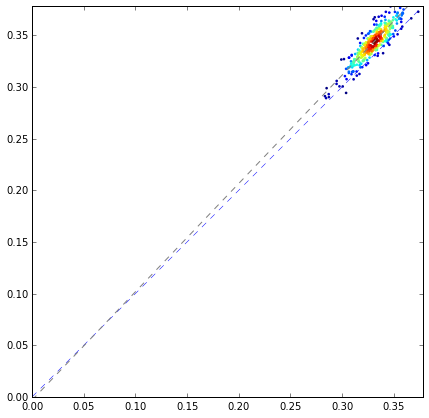

In [239]:
fhead = 'data/50SMG20165100'

def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2: center[0]+xwin/2, center[1]-ywin/2:center[1]+ywin/2]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

def cost(p, process):    
    xstd,ystd,angle,sx, sy = p
    xwin,ywin = 100,100
    
    i, j = process
    print 'patch %s%s'%(i,j)
    
    #modis_cut = modis_sent[s1,s2]*0.001
    in_patch = (centers[0]>=i*1000)&(centers[0]<i*1000+1000)&(centers[1]>=j*1000)&(centers[1]<j*1000+1000)
    patchx, patchy = (centers[0])[in_patch], (centers[1])[in_patch]
    
    to_regression =[]
    
    sen_cut = b8[i*1000:i*1000+1000, j*1000:j*1000+1000]
    modis_sen = modis_sent[i*1000:i*1000+1000, j*1000:j*1000+1000]*0.001
    
    for ii,cx in enumerate(patchx):
        cy = patchy[ii] - j*1000
        cx -= i*1000
        minx = cx+sx - 50
        maxx = cx+sx + 50
        miny = cy+sy - 50
        maxy = cy+sy + 50

        to_conv = sen_cut[max(0, minx): min(1000, maxx), max(0, miny): min(1000, maxy)]
        brdf = modis_sen[cx,cy]

        if (to_conv.shape[0]==100) & (to_conv.shape[1]==100) & (brdf!=np.nan):
            To_conv = to_conv

            Brdf = brdf
            nanval = np.where(~((To_conv < 1)&(To_conv > 0)))
            To_conv[nanval[0], nanval[1]] = np.nanmean(To_conv)
            gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                              
            ker = gaus/(gaus.sum())

            s = signal.fftconvolve(To_conv, ker, mode='valid')
            to_regression.append([s[0][0], Brdf])
    
    x,y = np.array(to_regression).T
    global to_regression
    nanm = (np.isnan(x))|(np.isnan(y))
    r = scipy.stats.linregress(x[~nanm],y[~nanm])
    costs = abs(1-r.rvalue)
    print 'costs:', costs, 'rvalue: ', r.rvalue, 'slop: ', r.slope, '\n', 'parameters: ', p,'\n'
    return costs
                
def solve(process):
    solved = []
    for i,j in process:
        p = np.array([29.696923, 339.96191637, 45.8861022468,-21.8540896067 , 60.2630764605])
        psolve = optimize.fmin(cost,p, full_output=1,args=(([i,j],)))
        solved.append([i,j,psolve])
        print 'solved one: ', psolve, '\n'
    return solved


def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

    
psolve4 = solve(([2,4],))

x,y = np.array(to_regression).T
nanm = (np.isnan(x))|(np.isnan(y))
y,x = x[~nanm], y[~nanm]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

In [243]:
fhead = 'data/50SMG20165100'

def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2: center[0]+xwin/2, center[1]-ywin/2:center[1]+ywin/2]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

def cost(p, process):    
    xstd,ystd,angle,sx, sy = p
    xwin,ywin = 100,100
    
    i, j = process
    print 'patch %s%s'%(i,j)
    
    #modis_cut = modis_sent[s1,s2]*0.001
    in_patch = (centers[0]>=i*1000)&(centers[0]<i*1000+1000)&(centers[1]>=j*1000)&(centers[1]<j*1000+1000)
    patchx, patchy = (centers[0])[in_patch], (centers[1])[in_patch]
    
    to_regression =[]
    
    sen_cut = b8[i*1000:i*1000+1000, j*1000:j*1000+1000]
    modis_sen = modis_sent[i*1000:i*1000+1000, j*1000:j*1000+1000]*0.001
    
    for ii,cx in enumerate(patchx):
        cy = patchy[ii] - j*1000
        cx -= i*1000
        minx = cx+sx - 50
        maxx = cx+sx + 50
        miny = cy+sy - 50
        maxy = cy+sy + 50

        to_conv = sen_cut[max(0, minx): min(1000, maxx), max(0, miny): min(1000, maxy)]
        brdf = modis_sen[cx,cy]

        if (to_conv.shape[0]==100) & (to_conv.shape[1]==100) & (brdf!=np.nan):
            To_conv = to_conv

            Brdf = brdf
            nanval = np.where(~((To_conv < 1)&(To_conv > 0)))
            To_conv[nanval[0], nanval[1]] = np.nanmean(To_conv)
            gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                              
            ker = gaus/(gaus.sum())

            s = signal.fftconvolve(To_conv, ker, mode='valid')
            to_regression.append([s[0][0], Brdf])
    
    x,y = np.array(to_regression).T
    global to_regression
    nanm = (np.isnan(x))|(np.isnan(y))
    r = scipy.stats.linregress(x[~nanm],y[~nanm])
    costs = abs(1-r.rvalue)
    print 'costs:', costs, 'rvalue: ', r.rvalue, 'slop: ', r.slope, '\n', 'parameters: ', p,'\n'
    return costs
                
def solve(process):
    solved = []
    for i,j in process:
        p = np.array([29.696923, 339.96191637, 45.8861022468,-21.8540896067 , 60.2630764605])
        psolve = optimize.fmin(cost,p, full_output=1,args=(([i,j],)))
        solved.append([i,j,psolve])
        print 'solved one: ', psolve, '\n'
    return solved


def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

<ipython-input-243-648175528078>:62: SyntaxWarning: name 'to_regression' is assigned to before global declaration
  global to_regression


In [242]:
mcs

[(2, 4),
 (9, 6),
 (9, 2),
 (1, 4),
 (0, 1),
 (2, 9),
 (4, 8),
 (3, 9),
 (9, 5),
 (1, 3)]

patch 24
costs: 0.117039645907 rvalue:  0.882960354093 slop:  1.0713415926 
parameters:  [  29.696923    339.96191637   45.88610225  -21.85408961   60.26307646] 

patch 24
costs: 0.117154612099 rvalue:  0.882845387901 slop:  1.07393026766 
parameters:  [  31.18176915  339.96191637   45.88610225  -21.85408961   60.26307646] 

patch 24
costs: 0.117046955424 rvalue:  0.882953044576 slop:  1.07134437245 
parameters:  [  29.696923    356.96001219   45.88610225  -21.85408961   60.26307646] 

patch 24
costs: 0.117494129504 rvalue:  0.882505870496 slop:  1.07071571909 
parameters:  [  29.696923    339.96191637   48.18040736  -21.85408961   60.26307646] 

patch 24
costs: 0.117095852633 rvalue:  0.882904147367 slop:  1.07145248599 
parameters:  [  29.696923    339.96191637   45.88610225  -22.94679409   60.26307646] 

patch 24
costs: 0.11871057938 rvalue:  0.88128942062 slop:  1.06930554609 
parameters:  [  29.696923    339.96191637   45.88610225  -21.85408961   63.27623028] 

patch 24
costs: 0.1

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in less



patch 96
costs: 0.225069307345 rvalue:  0.774930692655 slop:  0.974397004574 
parameters:  [  29.696923    339.96191637   45.88610225  -21.85408961   60.26307646] 

patch 96
costs: 0.225033670089 rvalue:  0.774966329911 slop:  0.976797962078 
parameters:  [  31.18176915  339.96191637   45.88610225  -21.85408961   60.26307646] 

patch 96
costs: 0.225080784001 rvalue:  0.774919215999 slop:  0.974398721709 
parameters:  [  29.696923    356.96001219   45.88610225  -21.85408961   60.26307646] 

patch 96
costs: 0.225494085519 rvalue:  0.774505914481 slop:  0.973726397396 
parameters:  [  29.696923    339.96191637   48.18040736  -21.85408961   60.26307646] 

patch 96
costs: 0.224875801735 rvalue:  0.775124198265 slop:  0.973334518809 
parameters:  [  29.696923    339.96191637   45.88610225  -22.94679409   60.26307646] 

patch 96
costs: 0.231416492215 rvalue:  0.768583507785 slop:  0.96483195284 
parameters:  [  29.696923    339.96191637   45.88610225  -21.85408961   63.27623028] 

patch 96
c

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in greater


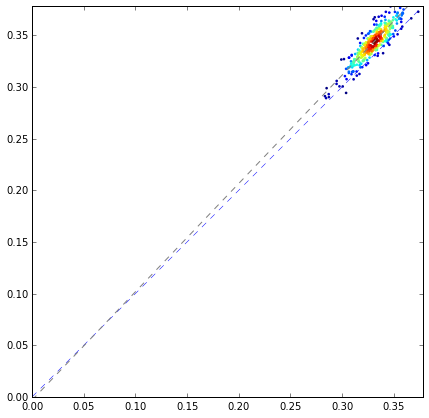

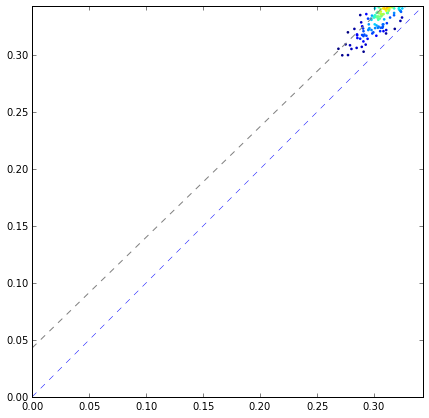

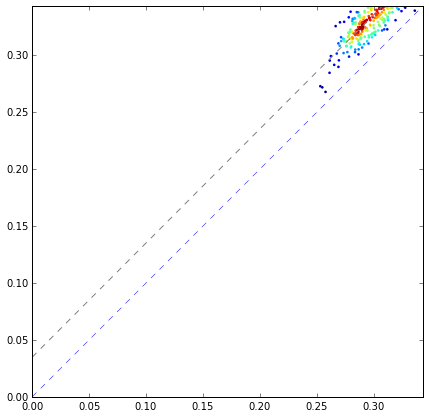

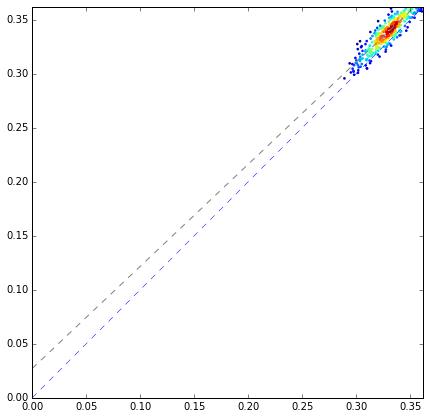

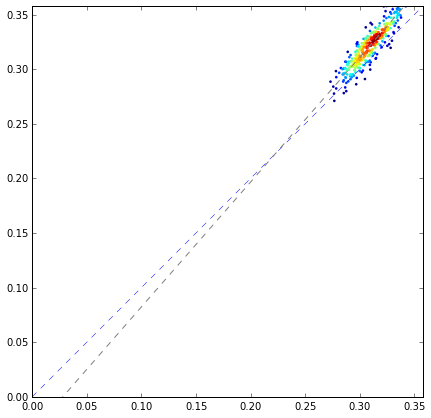

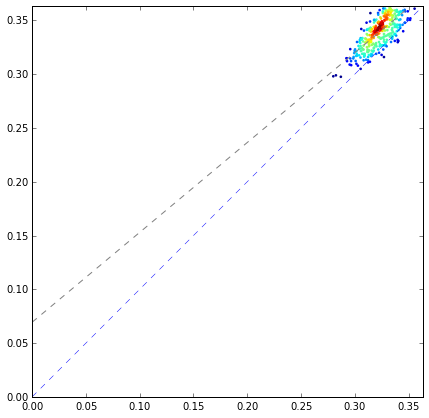

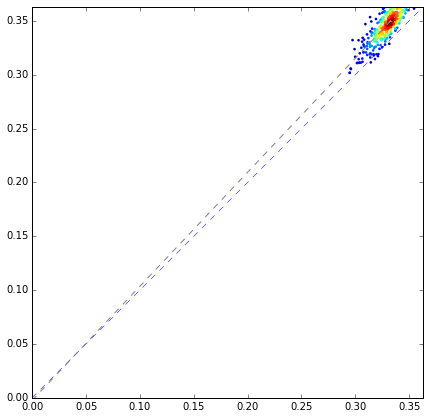

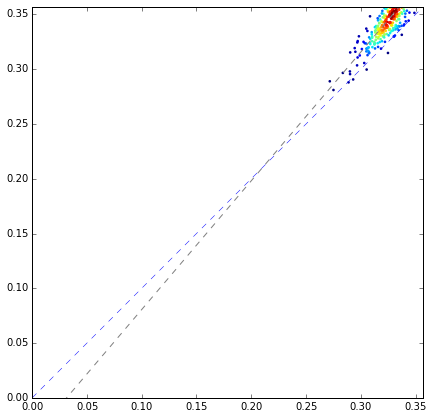

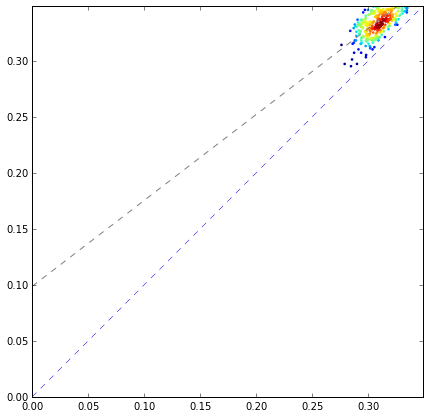

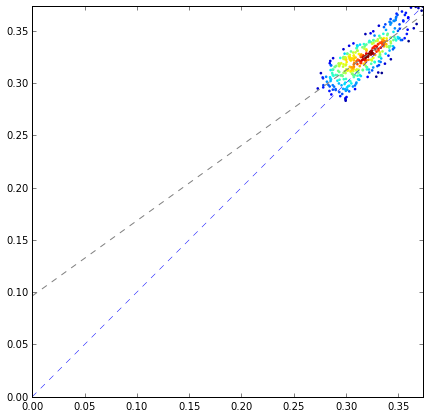

In [244]:
to_regs = []
solves = []
for rr, cc in mcs:    
    psolve = solve(([rr,cc],))
    solves.append(psolve)
    to_regs.append(to_regression)
    x,y = np.array(to_regression).T
    nanm = (np.isnan(x))|(np.isnan(y))
    y,x = x[~nanm], y[~nanm]
    dif = x-y
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)

    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

    x = x[inliers]
    y = y[inliers]
    maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
    xy = np.vstack([y,x])
    z = gaussian_kde(xy)(xy)

    fit = np.polyfit(y,x,1)
    fit_fn = np.poly1d(fit)

    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(y, x, c=z, s=7, edgecolor='')
    plt.plot([0,1],[0.,1], '--',linewidth=0.5)
    plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    plt.xlim(0, maxval)
    plt.ylim(0, maxval)
    r = scipy.stats.linregress(y,x)
    print r

In [274]:
solved = np.array([[i[0][0], i[0][1], i[0][2][0][0], i[0][2][0][1], i[0][2][0][2], i[0][2][0][3], i[0][2][0][4],  i[0][2][1]] for i in solves])

patch 15
costs: 0.049720127983 rvalue:  0.950279872017 slop:  1.104870111 
parameters:  [  29.696923    339.96191637   45.88610225  -21.85408961   60.26307646] 

patch 15
costs: 0.0497608803737 rvalue:  0.950239119626 slop:  1.10648541775 
parameters:  [  31.18176915  339.96191637   45.88610225  -21.85408961   60.26307646] 

patch 15
costs: 0.0497253631854 rvalue:  0.950274636815 slop:  1.10486961621 
parameters:  [  29.696923    356.96001219   45.88610225  -21.85408961   60.26307646] 

patch 15
costs: 0.0498987309178 rvalue:  0.950101269082 slop:  1.1046286632 
parameters:  [  29.696923    339.96191637   48.18040736  -21.85408961   60.26307646] 

patch 15
costs: 0.0491935820385 rvalue:  0.950806417961 slop:  1.10503075813 
parameters:  [  29.696923    339.96191637   45.88610225  -22.94679409   60.26307646] 

patch 15
costs: 0.0520155390414 rvalue:  0.947984460959 slop:  1.10338437086 
parameters:  [  29.696923    339.96191637   45.88610225  -21.85408961   63.27623028] 

patch 15
costs

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in greater


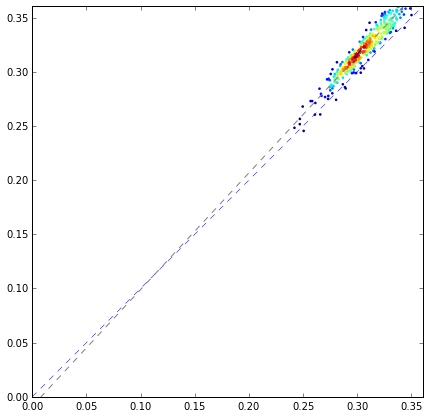

In [273]:
psolve = solve(([1,5],))
solves.append(psolve)
to_regs.append(to_regression)
x,y = np.array(to_regression).T
nanm = (np.isnan(x))|(np.isnan(y))
y,x = x[~nanm], y[~nanm]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

<matplotlib.colorbar.Colorbar instance at 0x7ff90eba6d40>

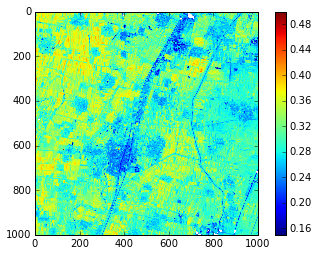

In [301]:
plt.imshow(b8[1000:2000,5000:6000], vmin=0.15, vmax=0.50)
plt.colorbar()

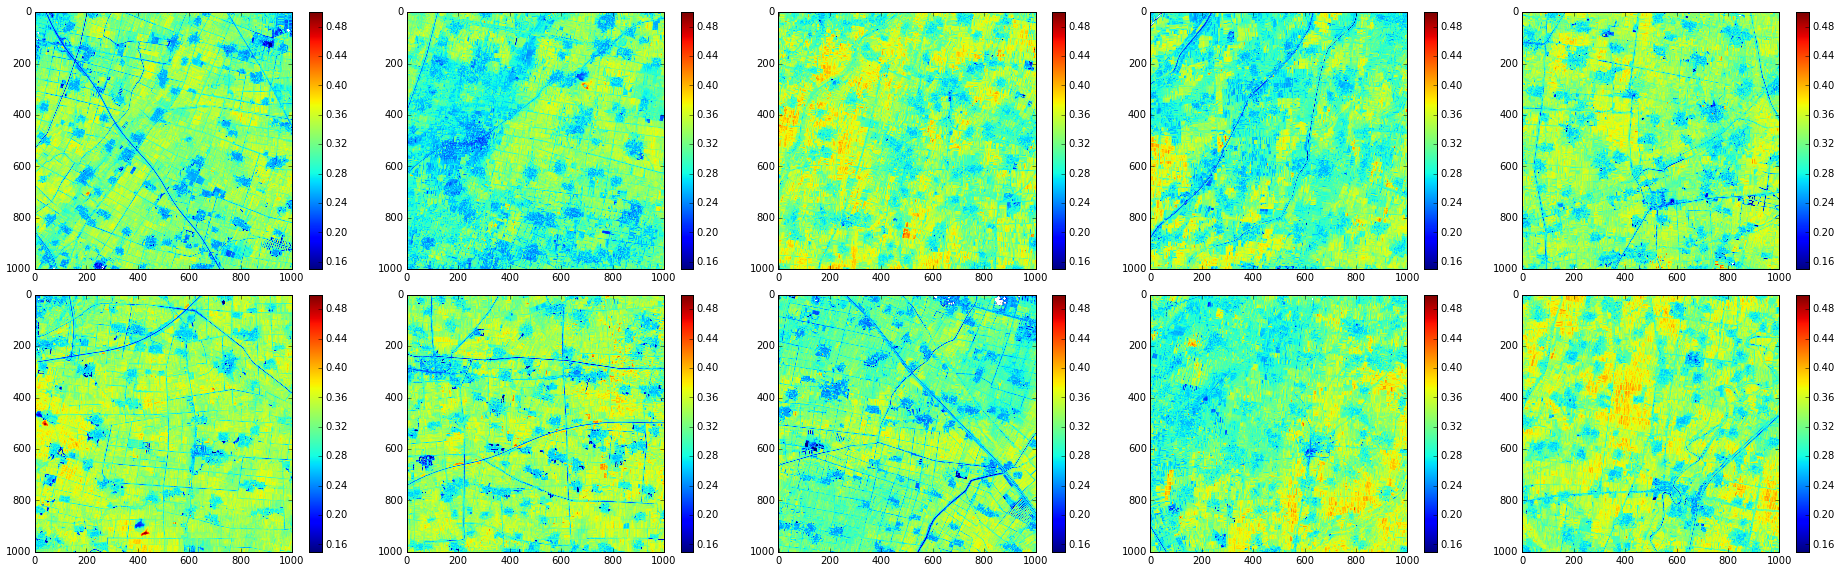

In [293]:
fig = plt.figure(figsize=(26,8))
for ii,cs in enumerate(mcs):
    ax = fig.add_subplot(2, 5, ii)
    i, j = cs
    axm = ax.imshow(b8[i*1000:i*1000+1000, j*1000:j*1000+1000], vmin=0.15, vmax=0.50)
    plt.colorbar(axm)
plt.tight_layout()

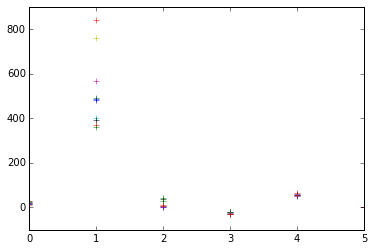

In [323]:
plt.plot(np.array(solved[:10]).T[2:], '+')

In [314]:
def cost(process):    
    xstd,ystd,angle,sx, sy = 29.696923, 339.96191637, 45.8861022468,-21.8540896067 , 60.2630764605
    xwin,ywin = 100,100
    
    i, j = process
    print 'patch %s%s'%(i,j)
    
    #modis_cut = modis_sent[s1,s2]*0.001
    in_patch = (centers[0]>=i*1000)&(centers[0]<i*1000+1000)&(centers[1]>=j*1000)&(centers[1]<j*1000+1000)
    patchx, patchy = (centers[0])[in_patch], (centers[1])[in_patch]
    
    to_regression =[]
    
    sen_cut = b8[i*1000:i*1000+1000, j*1000:j*1000+1000]
    modis_sen = modis_sent[i*1000:i*1000+1000, j*1000:j*1000+1000]*0.001
    
    for ii,cx in enumerate(patchx):
        cy = patchy[ii] - j*1000
        cx -= i*1000
        minx = cx+sx - 50
        maxx = cx+sx + 50
        miny = cy+sy - 50
        maxy = cy+sy + 50

        to_conv = sen_cut[max(0, minx): min(1000, maxx), max(0, miny): min(1000, maxy)]
        brdf = modis_sen[cx,cy]

        if (to_conv.shape[0]==100) & (to_conv.shape[1]==100) & (brdf!=np.nan):
            To_conv = to_conv

            Brdf = brdf
            nanval = np.where(~((To_conv < 1)&(To_conv > 0)))
            To_conv[nanval[0], nanval[1]] = np.nanmean(To_conv)
            gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                              
            ker = gaus/(gaus.sum())

            s = signal.fftconvolve(To_conv, ker, mode='valid')
            to_regression.append([s[0][0], Brdf])
    
    x,y = np.array(to_regression).T
    global to_regression
    nanm = (np.isnan(x))|(np.isnan(y))
    r = scipy.stats.linregress(x[~nanm],y[~nanm])
    costs = abs(1-r.rvalue)
    print 'costs:', costs, 'rvalue: ', r.rvalue, 'slop: ', r.slope, '\n', 'parameters: ', xstd,ystd,angle,sx, sy,'\n'
    return costs

<ipython-input-314-698300dc3627>:41: SyntaxWarning: name 'to_regression' is assigned to before global declaration
  global to_regression


In [315]:
applied = []
for rr, cc in mcs:    
    applied.append(cost([rr,cc]))

patch 24
costs: 0.117039645907 rvalue:  0.882960354093 slop:  1.0713415926 
parameters:  29.696923 339.96191637 45.8861022468 -21.8540896067 60.2630764605 

patch 96
costs: 0.225069307345 rvalue:  0.774930692655 slop:  0.974397004574 
parameters:  29.696923 339.96191637 45.8861022468 -21.8540896067 60.2630764605 

patch 92
costs: 0.151223897454 rvalue:  0.848776102546 slop:  0.982855223833 
parameters:  29.696923 339.96191637 45.8861022468 -21.8540896067 60.2630764605 

patch 14
costs: 0.124329850975 rvalue:  0.875670149025 slop:  0.973938299462 
parameters:  29.696923 339.96191637 45.8861022468 -21.8540896067 60.2630764605 

patch 01
costs: 0.10946397211 rvalue:  0.89053602789 slop:  1.18556681815 
parameters:  29.696923 339.96191637 45.8861022468 -21.8540896067 60.2630764605 

patch 29
costs: 0.29030517946 rvalue:  0.70969482054 slop:  0.892867956016 
parameters:  29.696923 339.96191637 45.8861022468 -21.8540896067 60.2630764605 

patch 48
costs: 0.165209170146 rvalue:  0.83479082985

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


#### The errors map for each band 
with the applied paramters are xstd,ystd,angle,sx, sy = 29.696923, 339.96191637, 45.8861022468,-21.8540896067 , 60.2630764605, respectively.

In [380]:
b4_modis = parallel_rw_pkl(None, 'errsb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'errsb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'errsb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'errsb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'errsb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'errsb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'errsb12_modis', 'r')

In [381]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

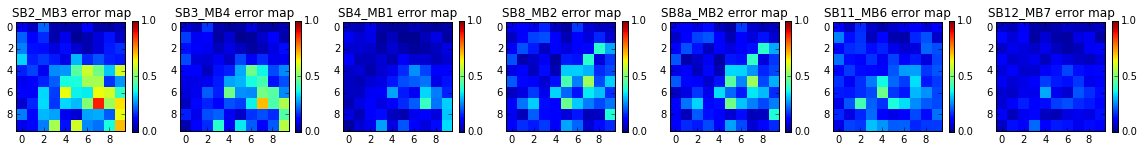

In [385]:
fig = plt.figure(figsize=(20,2))
mask = np.ones((10,10))
for ii,i in enumerate(bands):
    data = np.zeros((10,10))
    for j in i:
        data[j[0], j[1]] = j[2]
    ax = fig.add_subplot(1,7,ii+1)
    cx = ax.imshow(data, interpolation ='Nearest', vmin=0, vmax=1.)
    fig.colorbar(cx,ticks=[0.,0.5,1.])
    ax.set_title('%s error map'%(names[ii]))
    mask = mask*(data<0.4)

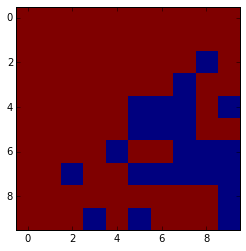

In [386]:
plt.imshow(mask.astype(bool), interpolation ='Nearest')

In [387]:
x,y = np.where(mask)
print zip(x,y)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 5), (6, 6), (7, 0), (7, 1), (7, 3), (7, 4), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (9, 0), (9, 1), (9, 2), (9, 4), (9, 6), (9, 7), (9, 8)]


#### Apply to the patches with smaller errors

In [376]:
b4_modis = parallel_rw_pkl(None, 'eropb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'eropb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'eropb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'eropb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'eropb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'eropb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'eropb12_modis', 'r')

In [377]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

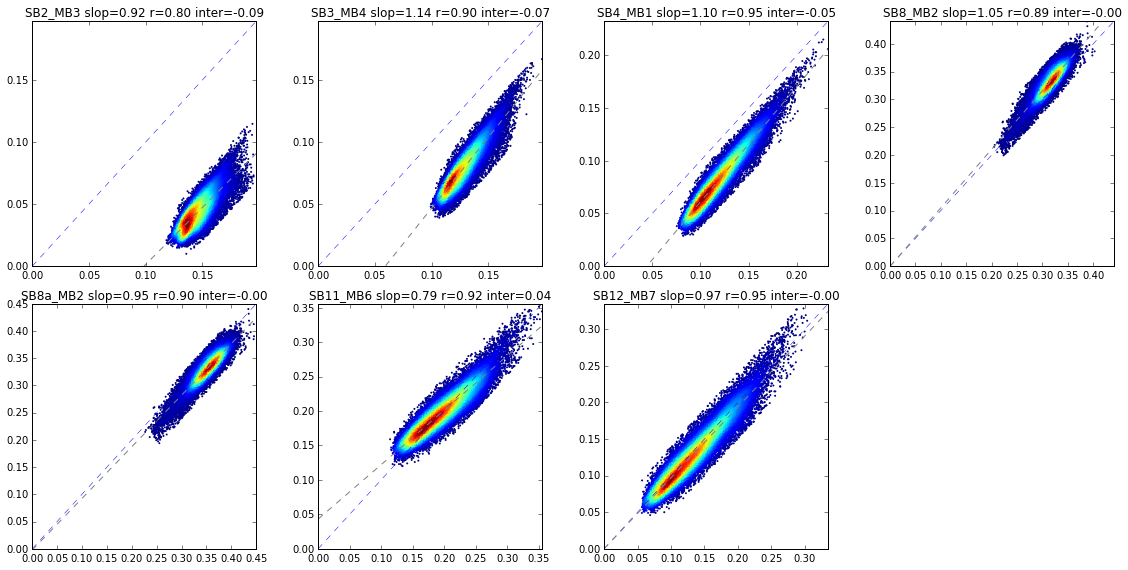

In [378]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

#### Set a new threshold

In [419]:
b4_modis = parallel_rw_pkl(None, 'errsb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'errsb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'errsb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'errsb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'errsb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'errsb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'errsb12_modis', 'r')

In [420]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

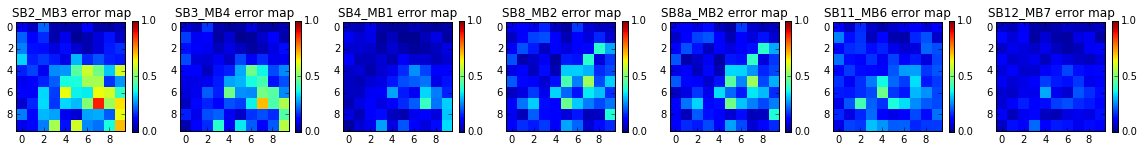

In [388]:
fig = plt.figure(figsize=(20,2))
mask = np.ones((10,10))
for ii,i in enumerate(bands):
    data = np.zeros((10,10))
    for j in i:
        data[j[0], j[1]] = j[2]
    ax = fig.add_subplot(1,7,ii+1)
    cx = ax.imshow(data, interpolation ='Nearest', vmin=0, vmax=1.)
    fig.colorbar(cx,ticks=[0.,0.5,1.])
    ax.set_title('%s error map'%(names[ii]))
    mask = mask*(data<0.3)

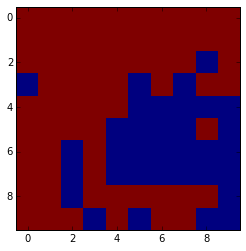

In [389]:
plt.imshow(mask.astype(bool), interpolation ='Nearest')

In [391]:
x,y = np.where(mask)
print zip(x,y)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 1), (3, 2), (3, 3), (3, 4), (3, 6), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 0), (5, 1), (5, 2), (5, 3), (5, 8), (6, 0), (6, 1), (6, 3), (7, 0), (7, 1), (7, 3), (8, 0), (8, 1), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (9, 0), (9, 1), (9, 2), (9, 4), (9, 6), (9, 7)]


In [392]:
b4_modis = parallel_rw_pkl(None, 'eropb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'eropb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'eropb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'eropb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'eropb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'eropb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'eropb12_modis', 'r')

In [393]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

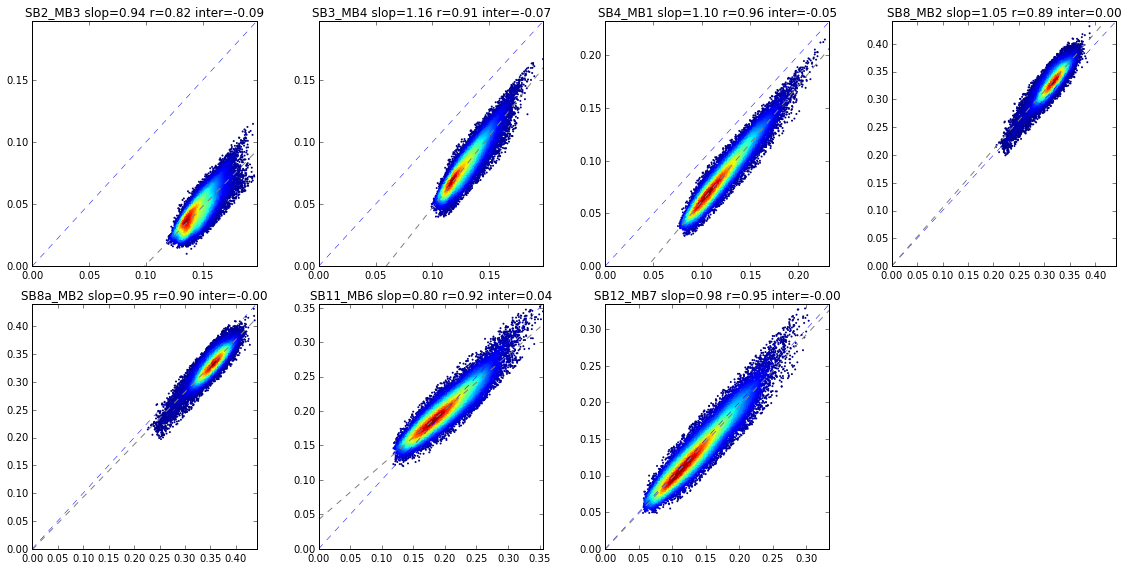

In [394]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

Band2 is the most easily influenced by the cloud:

<matplotlib.colorbar.Colorbar instance at 0x7ff90f05cb90>

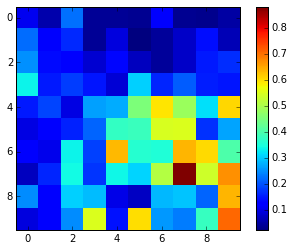

In [421]:
data = np.zeros((10,10))
for i in bands[0]:
    data[i[0], i[1]] = i[2]
plt.imshow(data, interpolation='Nearest')
plt.colorbar()

[(0, 0), (0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 1), (3, 2), (3, 3), (3, 4), (3, 6), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2), (5, 8), (6, 0), (6, 1), (6, 3), (7, 0), (7, 1), (7, 3), (8, 1), (8, 4), (8, 5), (9, 0), (9, 1), (9, 4)]


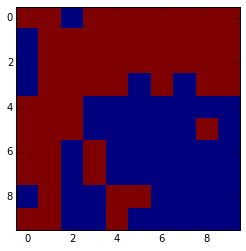

In [403]:
plt.imshow(data<0.2, interpolation='Nearest')
x, y = np.where(data<0.2)
print zip(x,y)

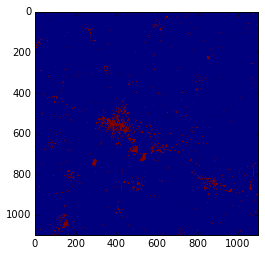

In [409]:
plt.imshow(cm[::10,::10])

In [412]:
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
cs = np.zeros((10,10))
for i,j in patches:
    cs[i,j] = (cm[i*1000:i*1000+1000, j*1000:j*1000+1000]).sum()/(1000.*1000.)

<matplotlib.colorbar.Colorbar instance at 0x7ff8fa0a9cb0>

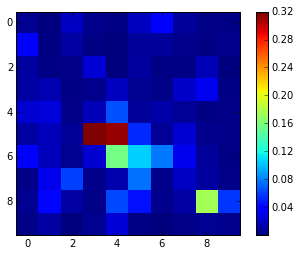

In [417]:
plt.imshow(cs, interpolation ='Nearest')
plt.colorbar()

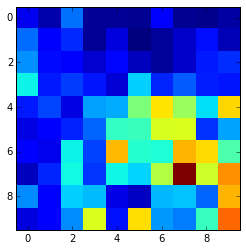

In [434]:
plt.imshow(data, interpolation ='Nearest')

It seams that the corrlation between the cloud mask and the errors map is not so direct. Thus, a check on the band2 image shows that the big errors are from the patches covered by heize, which is pretty obvious on the image from the band2 and band1 image. Hence a AOD would have a significant influence on the correlation between the MODIS BRDF and the Sentinel TOA reflectance.

So, a test on the remaining patches is used:

In [404]:
b4_modis = parallel_rw_pkl(None, 'eropb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'eropb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'eropb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'eropb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'eropb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'eropb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'eropb12_modis', 'r')

In [405]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data += i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

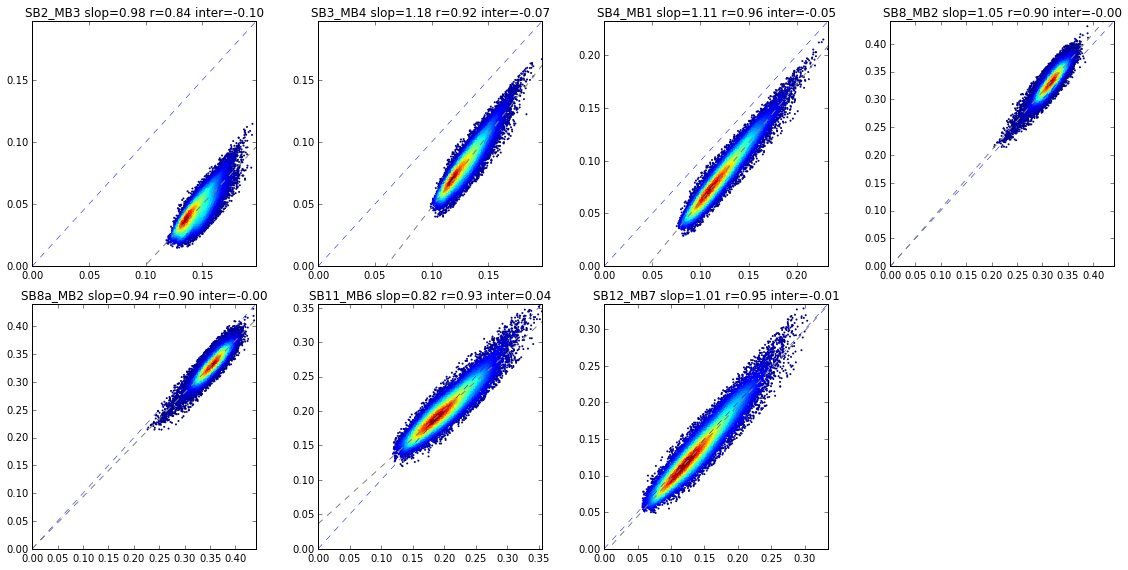

In [406]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

An improvement on the on the results can be achived for all of the results.